<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

# Descarga y manipulación de históricos

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
___

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [35]:
import numpy as np
import datetime
import scipy.stats as stats

# Importamos pandas
import pandas as pd

#algunas opciones para Pandas
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 78)
# pd.set_option('precision', 3)
pd.set_option('display.max_rows', 10)

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [36]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [37]:
# Cargamos hoja de calculo en un dataframe
file_name='precios/AAPL.csv'
aapl = pd.read_csv(file_name)
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,102.319397,53204600
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.436890,64285500
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.446251,65797100
3,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.840714,40105900
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,104.715256,59364500
...,...,...,...,...,...,...,...
750,2017-12-22,174.679993,175.419998,174.500000,175.009995,173.023026,16114600
751,2017-12-26,170.800003,171.470001,169.679993,170.570007,168.633423,33185500
752,2017-12-27,170.100006,170.779999,169.710007,170.600006,168.663101,21498200
753,2017-12-28,171.000000,171.850006,170.479996,171.080002,169.137650,16480200


#### Anotación #1
- Quisieramos indizar por fecha.

In [38]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col='Date')
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,102.319397,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,99.436890,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,99.446251,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,100.840714,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,104.715256,59364500
...,...,...,...,...,...,...
2017-12-22,174.679993,175.419998,174.500000,175.009995,173.023026,16114600
2017-12-26,170.800003,171.470001,169.679993,170.570007,168.633423,33185500
2017-12-27,170.100006,170.779999,169.710007,170.600006,168.663101,21498200


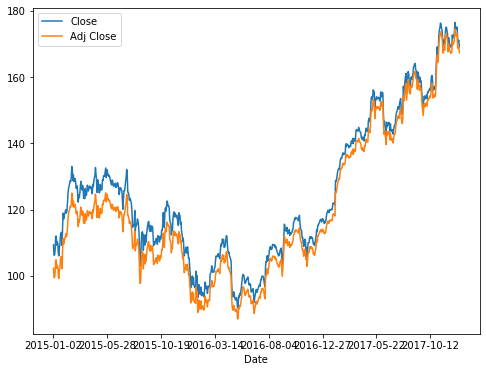

In [39]:
# Graficar precios de cierre y precios de cierre ajustados
import matplotlib.pyplot as plt
%matplotlib inline

aapl[['Close', 'Adj Close']].plot(figsize=(8,6));

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [40]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col='Date', usecols=['Date', 'Adj Close'])
aapl.columns = ['AAPL']
aapl

,AAPL
Date,
2015-01-02,102.319397
2015-01-05,99.436890
2015-01-06,99.446251
2015-01-07,100.840714
2015-01-08,104.715256
...,...
2017-12-22,173.023026
2017-12-26,168.633423
2017-12-27,168.663101


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [41]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [42]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: solo permite descargar datos de equities estadounidenses de manera gratuita. Es la base de datos más completa. Si se desea uasar hay que crear una cuenta para autenticarse en la API.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [43]:
# Ejemplo NXP finance (No funciona)
ticker = 'NXPI'
source = 'google'
start = '2015-01-01'
end = '2017-12-31'
# aapl_goo = web.DataReader(ticker, source, start, end)


>Página oficial de `quandl` para crear cuenta y tutorial de instalación de su api
> https://docs.quandl.com/docs/python-installation

> On most systems, the following commands will initiate installation:
> - [$ pip install quandl]


> On some systems, you may need this command instead:
> - [$ pip3 install quandl]

In [117]:
# Ejemplo quandl
import quandl

quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

ticker = ['NXPI','AAPL', 'MSFT','KO']
date = { 'gte': '2016-01-01', 'lte': '2020-05-31' }
column = { 'columns': ['ticker', 'date', 'Adj_close']}

data = quandl.get_table('WIKI/PRICES', qopts = column,ticker = ticker, date = date)# ticker = 'WIKI/AAPL' #'AAPL.US'
data = data.set_index('date') # Poner los índices como las fechas

# Seleccionar los ADJ_CLOSE de ticker
data_n = [data.loc[data['ticker']== i,'adj_close'] for i in ticker]
data_n

[Series([], Name: adj_close, dtype: float64),
 date
 2018-03-27    168.340000
 2018-03-26    172.770000
 2018-03-23    164.940000
 2018-03-22    168.845000
 2018-03-21    171.270000
                  ...    
 2016-01-08     93.677776
 2016-01-07     93.185040
 2016-01-06     97.291172
 2016-01-05     99.233131
 2016-01-04    101.783763
 Name: adj_close, Length: 560, dtype: float64,
 date
 2018-03-27    89.470000
 2018-03-26    93.780000
 2018-03-23    87.180000
 2018-03-22    89.790000
 2018-03-21    92.480000
                 ...    
 2016-01-08    49.829617
 2016-01-07    49.677262
 2016-01-06    51.467434
 2016-01-05    52.419653
 2016-01-04    52.181598
 Name: adj_close, Length: 561, dtype: float64,
 date
 2018-03-27    42.890000
 2018-03-26    42.690000
 2018-03-23    42.330000
 2018-03-22    42.760000
 2018-03-21    43.000000
                 ...    
 2016-01-08    39.206398
 2016-01-07    39.310293
 2016-01-06    39.971447
 2016-01-05    40.188683
 2016-01-04    40.047007
 Name:

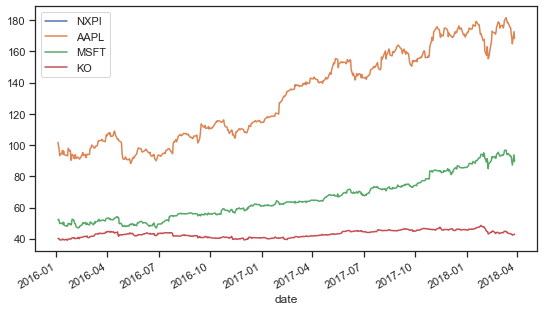

In [118]:
# Gráfica de precios
list(map(lambda i:data_n[i].plot(figsize=(9,5)),range(len(ticker))))
# data_n[0].column = ticker[0]
plt.legend(ticker)

### Uso de Pandas para bajar datos de Yahoo! Finance
Intentamos con la función YahooDailyReader

In [47]:
help(web.YahooDailyReader)

Help on class YahooDailyReader in module pandas_datareader.yahoo.daily:

class YahooDailyReader(pandas_datareader.base._DailyBaseReader)
 |  YahooDailyReader(symbols=None, start=None, end=None, retry_count=3, pause=0.1, session=None, adjust_price=False, ret_index=False, chunksize=1, interval='d', get_actions=False, adjust_dividends=True)
 |  
 |  Returns DataFrame of with historical over date range,
 |  start to end.
 |  To avoid being penalized by Yahoo! Finance servers, pauses between
 |  downloading 'chunks' of symbols can be specified.
 |  
 |  Parameters
 |  ----------
 |  symbols : string, array-like object (list, tuple, Series), or DataFrame
 |      Single stock symbol (ticker), array-like object of symbols or
 |      DataFrame with index containing stock symbols.
 |  start : string, int, date, datetime, Timestamp
 |      Starting date. Parses many different kind of date
 |      representations (e.g., 'JAN-01-2010', '1/1/10', 'Jan, 1, 1980'). Defaults to
 |      5 years before c

In [48]:
# YahooDailyReader
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2017-12-31'
aapl_yah = web.YahooDailyReader(ticker, start, end, interval='d').read()
aapl_yah

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.600000,19.200001,20.600000,19.389999,452156,19.389999
2015-01-05,20.590000,19.170000,19.700001,20.030001,467183,20.030001
2015-01-06,20.200001,19.270000,20.200001,19.570000,301361,19.570000
2015-01-07,19.950001,19.370001,19.670000,19.430000,222100,19.430000
2015-01-08,21.400000,19.430000,19.430000,20.840000,289943,20.840000
...,...,...,...,...,...,...
2017-12-22,30.299999,30.160000,30.250000,30.209999,208893,30.209999
2017-12-26,30.000000,29.820000,30.000000,29.879999,126312,29.879999
2017-12-27,30.000000,29.590000,29.860001,29.770000,330661,29.770000


Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [49]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [104]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['NXPI','AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2015-01-01'
end = '2017-12-31'
closes = get_closes(tickers=ticker, start_date=start, end_date=end, freq='d')
closes

,NXPI,AAPL,MSFT,NVDA,^GSPC
Date,,,,,
2015-01-02,74.885666,99.945885,41.748566,19.386309,2058.199951
2015-01-05,74.095963,97.130241,41.364658,19.058874,2020.579956
2015-01-06,70.566658,97.139420,40.757530,18.481041,2002.609985
2015-01-07,72.467812,98.501518,41.275364,18.432886,2025.900024
2015-01-08,75.889854,102.286186,42.489609,19.126284,2062.139893
...,...,...,...,...,...
2017-12-22,113.776291,169.009430,82.375114,193.764755,2683.340088
2017-12-26,113.649559,164.721680,82.269165,195.918015,2680.500000
2017-12-27,113.766548,164.750641,82.567787,195.650101,2682.620117


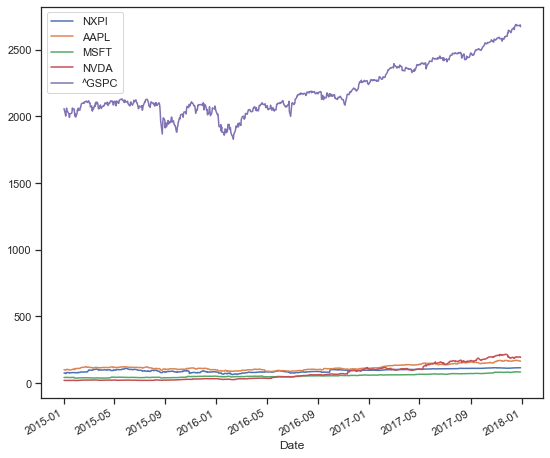

In [105]:
# Gráfica de datos
closes.plot(figsize=(9,8))

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Nvidia:NVDA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *closes*.

El objeto *assets* tiene la característica *items*. Con estos, se pueden verificar los registros almacenados

In [106]:
closes.items

<bound method DataFrame.items of                   NXPI        AAPL       MSFT        NVDA        ^GSPC
Date                                                                  
2015-01-02   74.885666   99.945885  41.748566   19.386309  2058.199951
2015-01-05   74.095963   97.130241  41.364658   19.058874  2020.579956
2015-01-06   70.566658   97.139420  40.757530   18.481041  2002.609985
2015-01-07   72.467812   98.501518  41.275364   18.432886  2025.900024
2015-01-08   75.889854  102.286186  42.489609   19.126284  2062.139893
...                ...         ...        ...         ...          ...
2017-12-22  113.776291  169.009430  82.375114  193.764755  2683.340088
2017-12-26  113.649559  164.721680  82.269165  195.918015  2680.500000
2017-12-27  113.766548  164.750641  82.567787  195.650101  2682.620117
2017-12-28  114.049286  165.214188  82.577423  195.878342  2687.540039
2017-12-29  114.156525  163.427597  82.404037  192.008392  2673.610107

[755 rows x 5 columns]>

Acceder a alguna posición específica de la variable *closes*

In [107]:
closes.iloc[0,0]

74.88566589355469

In [109]:
closes.loc['2015-01-02','NXPI']

74.88566589355469

Si deseamos encontrar los precios de cierre en una fecha específica usamos *2015-08-14*

In [110]:
closes.loc['2015-07-02','NXPI']

95.66177368164062

O, finalmente, los valores del S&P500

In [111]:
closes['^GSPC']
# assets.minor_xs('^GSPC')
# assets.loc['Adj Close']

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2017-12-22    2683.340088
2017-12-26    2680.500000
2017-12-27    2682.620117
2017-12-28    2687.540039
2017-12-29    2673.610107
Name: ^GSPC, Length: 755, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

In [57]:
ticker_mx = ['GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'AEROMEX.MX']

start = '2014-01-02'
end = '2014-12-31'
assets_mx = get_closes(tickers=ticker_mx, start_date=start, end_date=end, freq='d')
assets_mx

,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-01-02,63.696423,32.456123,78.120354,18.049999
2014-01-03,64.046753,32.040485,78.864120,18.090000
2014-01-06,62.036949,31.173059,77.462074,18.469999
2014-01-07,61.557541,32.212166,77.744202,19.459999
2014-01-08,61.096577,31.344736,77.017525,18.990000
...,...,...,...,...
2014-12-24,68.471588,33.982063,69.379349,19.639999
2014-12-26,69.468933,34.320061,69.344826,19.629999
2014-12-29,69.823143,34.986908,70.026627,19.520000


In [58]:
assets_mx_20140714 = assets_mx.loc['2014-07-14']
assets_mx_20140714

GCARSOA1.MX    67.414848
GFINBURO.MX    35.452789
GFNORTEO.MX    78.351700
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [59]:
assets_mx_20140714.idxmax(), assets_mx_20140714.max()

('GFNORTEO.MX', 78.35169982910156)

In [60]:
assets_mx_20140714.pop(assets_mx_20140714.idxmax())

78.35169982910156

In [61]:
assets_mx.iloc[[0, -1]]

,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-01-02,63.696423,32.456123,78.120354,18.049999
2014-12-31,67.660667,34.785938,70.078407,20.440001


In [62]:
assets_mx.iloc[[0, -1]].diff().iloc[1:]
# 20.44-18.05

,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-12-31,3.964245,2.329815,-8.041946,2.390001


# 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios `AEROMEX.MX`, así como el volumen de transacciones.

In [63]:
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2017-12-31'
aero_mx = web.YahooDailyReader(ticker, start, end, interval='d').read()
# Se extraen los precios de cierre y los volúmenes de transacción
clos_aero_mx = aero_mx['Adj Close']
# clos_aero_mx
vol_aero_mx = aero_mx['Volume']
vol_aero_mx
# vol_aero_mx.shape,clos_aero_mx.shape

Date
2015-01-02    452156
2015-01-05    467183
2015-01-06    301361
2015-01-07    222100
2015-01-08    289943
               ...  
2017-12-22    208893
2017-12-26    126312
2017-12-27    330661
2017-12-28    225042
2017-12-29    732755
Name: Volume, Length: 754, dtype: int64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

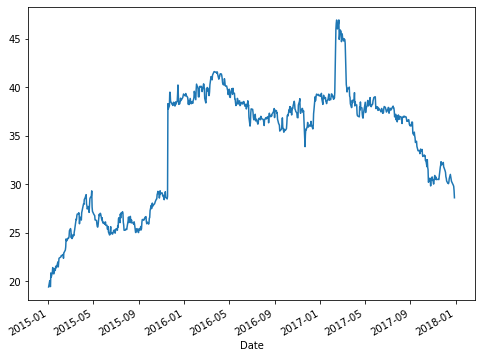

In [64]:
clos_aero_mx.plot(figsize=(8,6))

De forma similar, se grafica la serie de volúmenes de transacción

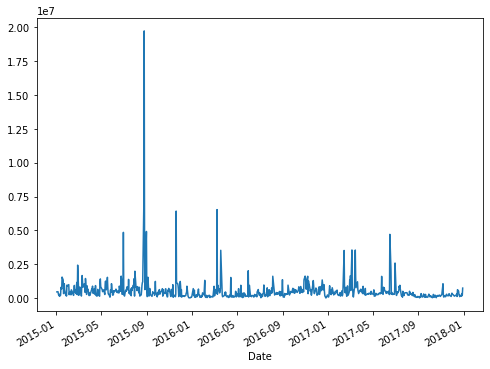

In [65]:
vol_aero_mx.plot(figsize=(8,6));

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Aeroméxico.

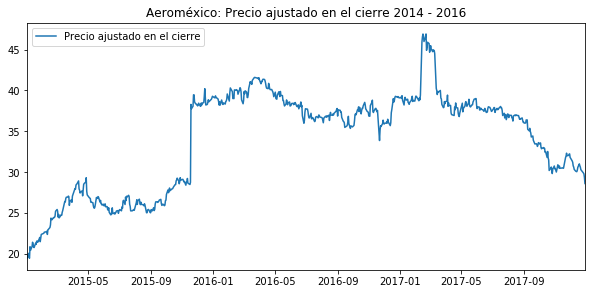

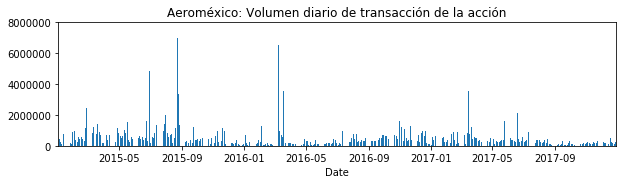

In [66]:
# top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# top.plot(msftAC.index, msftAC, label='Precio ajustado en el cierre')
# plt.title('Microsoft: Precio ajustado en el cierre 2014 - 2016')
# plt.legend(loc='best')
# bottom = plt.subplot2grid((4,4), (3, 0), rowspan=1, colspan=4)
# bottom.bar(msftV.index, msftV)
# plt.title('Microsoft: Volumen diario de transacción de la acción')
# plt.gcf().set_size_inches(12,8)
# plt.subplots_adjust(hspace=0.75)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
plt.xlim([clos_aero_mx.index[0],clos_aero_mx.index[-1]])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
plt.bar(vol_aero_mx.index, vol_aero_mx)
plt.title('Aeroméxico: Volumen diario de transacción de la acción')
plt.xlabel('Date')
plt.xlim([vol_aero_mx.index[0],vol_aero_mx.index[-1]])
plt.ylim([0,.8e7])
plt.show()

Otro procedimiento que se efectúa con frecuencia, es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [67]:
short_rollmean_AM_AC = clos_aero_mx.rolling(window=20).mean()
long_rollmean_AM_AC = clos_aero_mx.rolling(window=100).mean()
short_rollmean_AM_AC

Date
2015-01-02        NaN
2015-01-05        NaN
2015-01-06        NaN
2015-01-07        NaN
2015-01-08        NaN
               ...   
2017-12-22    30.9975
2017-12-26    30.8920
2017-12-27    30.7785
2017-12-28    30.6360
2017-12-29    30.4540
Name: Adj Close, Length: 754, dtype: float64

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

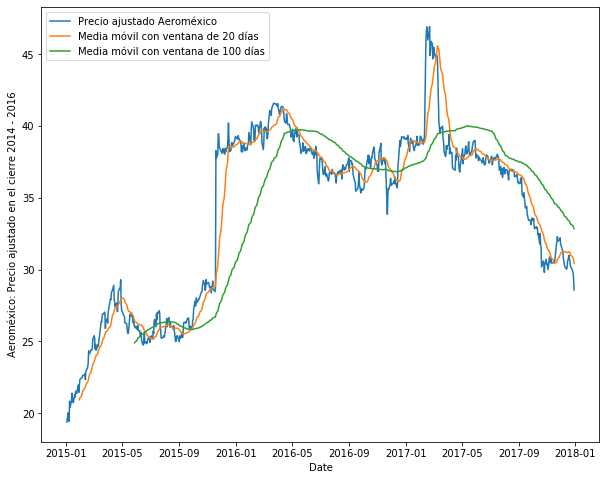

In [68]:
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado Aeroméxico')
ax.plot(short_rollmean_AM_AC.index, short_rollmean_AM_AC, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_AM_AC.index, long_rollmean_AM_AC, label='Media móvil con ventana de 100 días')
ax.set_xlabel('Date')
ax.set_ylabel('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
ax.legend(loc='best');

Las desviaciones estándar móviles se calculan con

In [69]:
short_rollstd_AM_AC = clos_aero_mx.rolling(window=20).std()
long_rollstd_AM_AC = clos_aero_mx.rolling(window=100).std()

y los gráficos...

In [70]:
clos_aero_mx

Date
2015-01-02    19.389999
2015-01-05    20.030001
2015-01-06    19.570000
2015-01-07    19.430000
2015-01-08    20.840000
                ...    
2017-12-22    30.209999
2017-12-26    29.879999
2017-12-27    29.770000
2017-12-28    29.330000
2017-12-29    28.590000
Name: Adj Close, Length: 754, dtype: float64

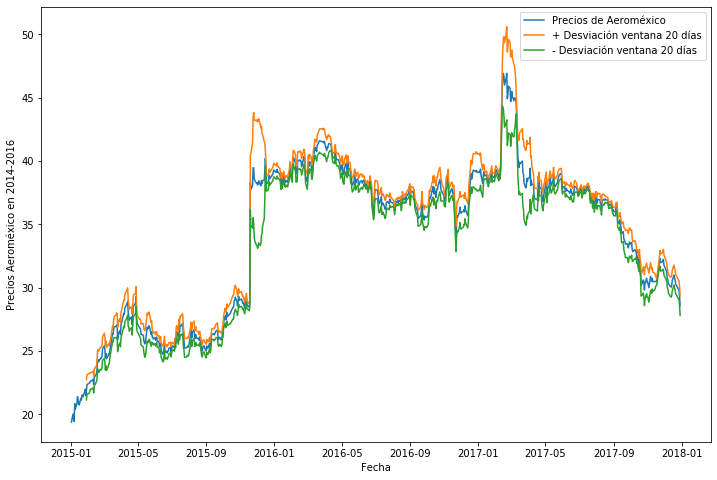

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+short_rollstd_AM_AC, label = '+ Desviación ventana 20 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-short_rollstd_AM_AC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

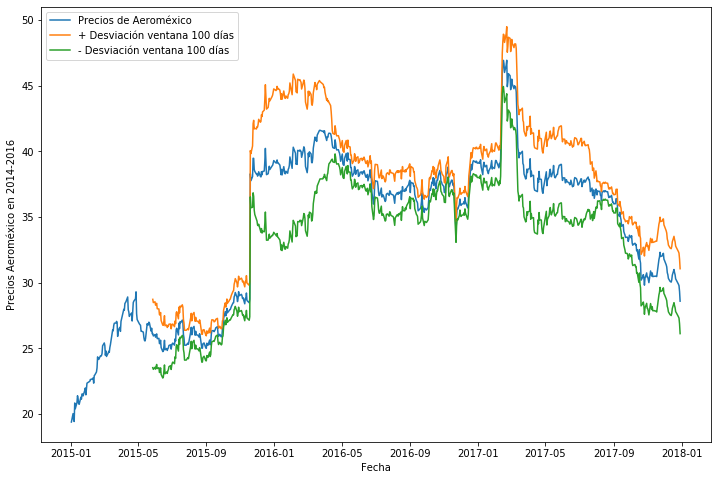

In [72]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+long_rollstd_AM_AC, label = '+ Desviación ventana 100 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-long_rollstd_AM_AC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

Podemos graficar los precios de las acciones americanas

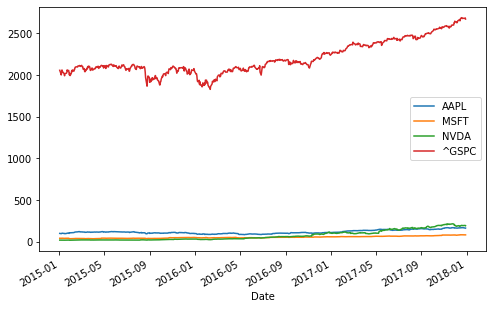

In [73]:
closes.plot(figsize=(8,5))

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

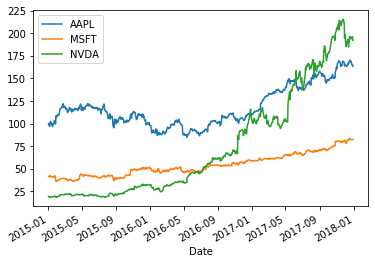

In [74]:
closes[['AAPL','MSFT','NVDA']].plot()

## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [75]:
closes

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,99.945885,41.748566,19.386309,2058.199951
2015-01-05,97.130241,41.364658,19.058874,2020.579956
2015-01-06,97.139420,40.757530,18.481041,2002.609985
2015-01-07,98.501518,41.275364,18.432886,2025.900024
2015-01-08,102.286186,42.489609,19.126284,2062.139893
...,...,...,...,...
2017-12-22,169.009430,82.375114,193.764755,2683.340088
2017-12-26,164.721680,82.269165,195.918015,2680.500000
2017-12-27,164.750641,82.567787,195.650101,2682.620117


In [76]:
closes.shift(1)

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,99.945885,41.748566,19.386309,2058.199951
2015-01-06,97.130241,41.364658,19.058874,2020.579956
2015-01-07,97.139420,40.757530,18.481041,2002.609985
2015-01-08,98.501518,41.275364,18.432886,2025.900024
...,...,...,...,...
2017-12-22,169.009430,82.365501,194.379929,2684.570068
2017-12-26,169.009430,82.375114,193.764755,2683.340088
2017-12-27,164.721680,82.269165,195.918015,2680.500000


In [77]:
Rall = ((closes-closes.shift(1))/closes.shift(1)).iloc[1:]
Rall

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037617,0.017888
2015-01-09,0.001072,-0.008405,0.004029,-0.008404
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001367,0.000791


Ya está implementada la fórmula para obtener cambios porcentuales

In [78]:
Rall1 = closes.pct_change(1).iloc[1:]
Rall1

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037617,0.017888
2015-01-09,0.001072,-0.008405,0.004029,-0.008404
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001367,0.000791


y la gráfica de los mismos se puede obtener como

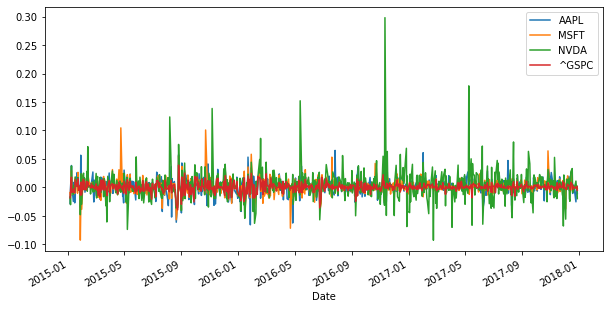

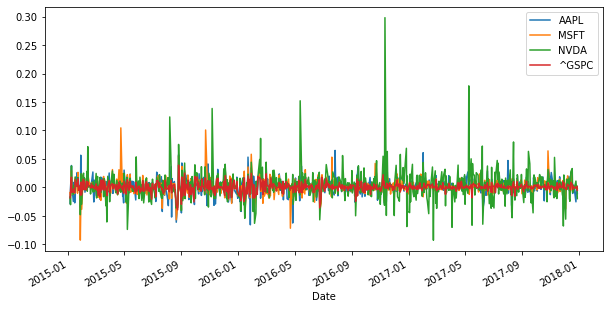

In [79]:
Rall.plot(figsize=(10,5));
Rall1.plot(figsize=(10,5));

Donde se observa que el rendimiento tiene una tendencia mas o menos constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

In [80]:
rall = np.log(closes/closes.shift(1)).iloc[1:]

In [81]:
rall

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-05,-0.028576,-0.009238,-0.017034,-0.018447
2015-01-06,0.000094,-0.014786,-0.030787,-0.008933
2015-01-07,0.013925,0.012625,-0.002609,0.011563
2015-01-08,0.037703,0.028994,0.036927,0.017730
2015-01-09,0.001071,-0.008441,0.004020,-0.008439
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003170,-0.000458
2017-12-26,-0.025697,-0.001287,0.011051,-0.001059
2017-12-27,0.000176,0.003623,-0.001368,0.000791


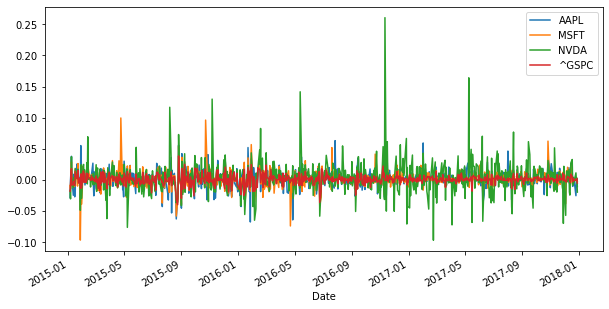

In [82]:
rall.plot(figsize=(10,5));

Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

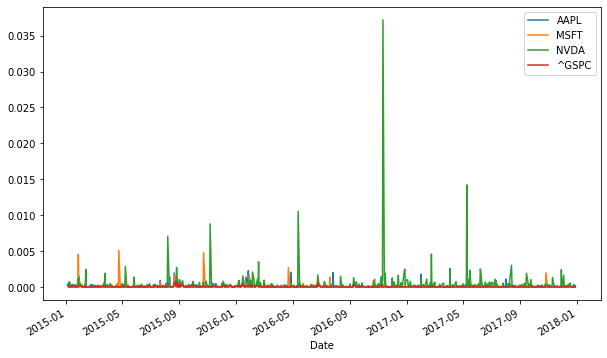

In [83]:
np.abs(rall-Rall).plot(figsize=(10,6));

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [84]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [85]:
msftAC = closes['MSFT']
msftAC

Date
2015-01-02    41.748566
2015-01-05    41.364658
2015-01-06    40.757530
2015-01-07    41.275364
2015-01-08    42.489609
                ...    
2017-12-22    82.375114
2017-12-26    82.269165
2017-12-27    82.567787
2017-12-28    82.577423
2017-12-29    82.404037
Name: MSFT, Length: 755, dtype: float64

In [86]:
Rmsft = simple_daily_ret(msftAC)

In [87]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

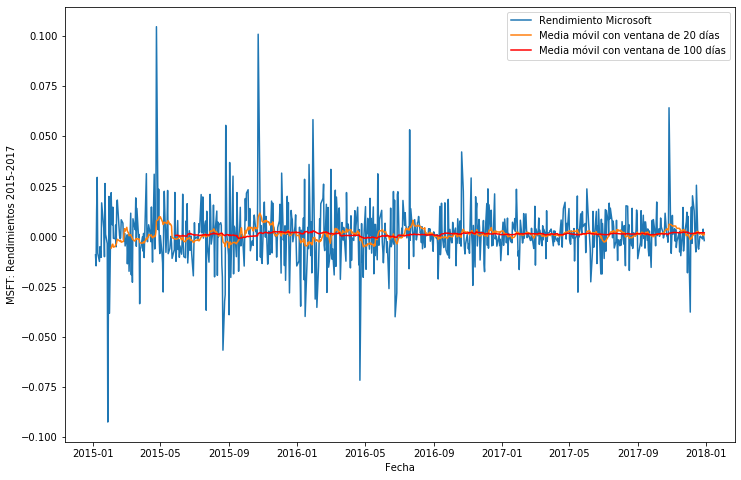

In [88]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

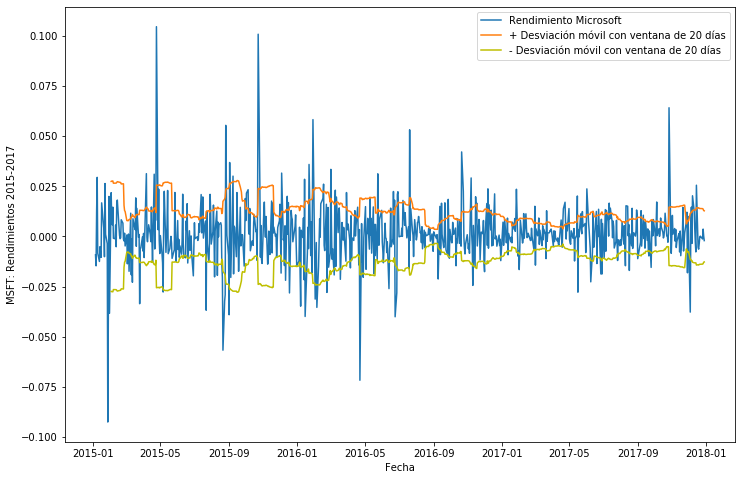

In [89]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

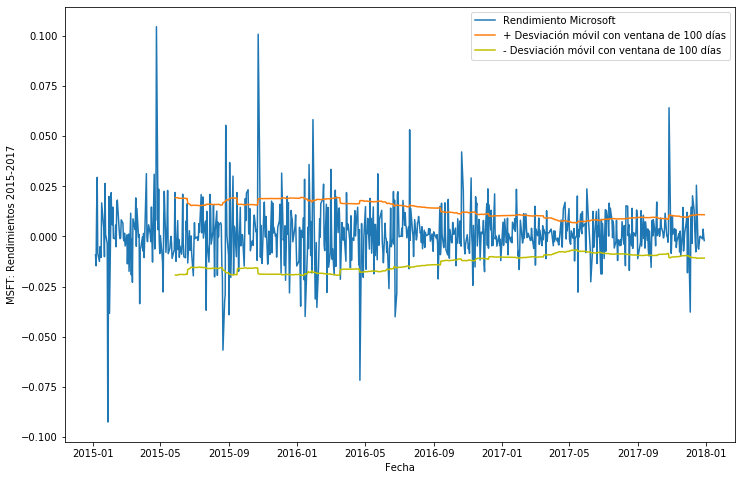

In [90]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

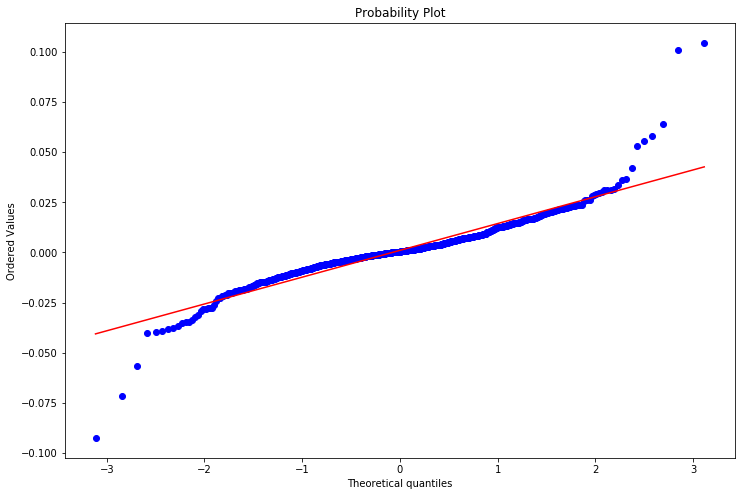

In [91]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist='norm', plot=ax);

Una más, con la librería seaborn... También se pueden instalar paquetes de python desde jupyter, usando el comando `!python -m pip install <package>`, como se ilustra a continuación

In [92]:
!python -m pip install seaborn

In [93]:
import seaborn as sns

Otra manera de instalar una librería, es usar el método clásico de *Anaconda prompt* usando el comando `conda install -c anaconda seaborn`

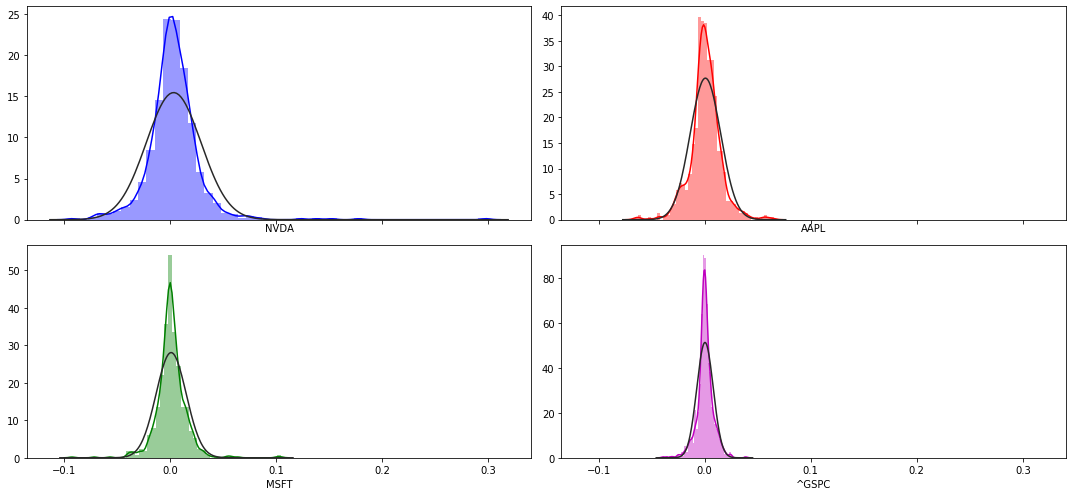

In [94]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall.loc[:,'NVDA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall.loc[:,'AAPL'], color="r", fit=stats.norm, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

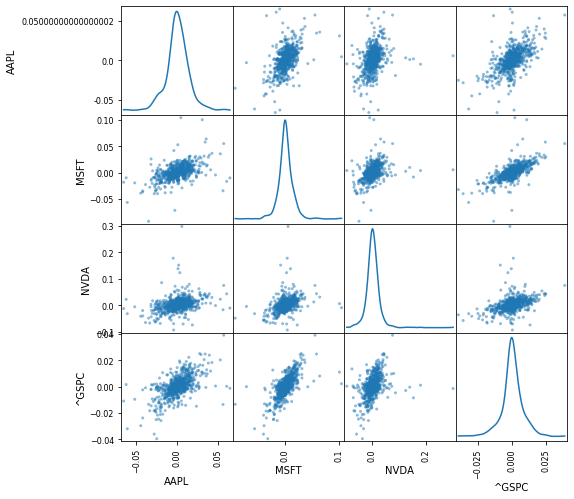

In [95]:
import pandas.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

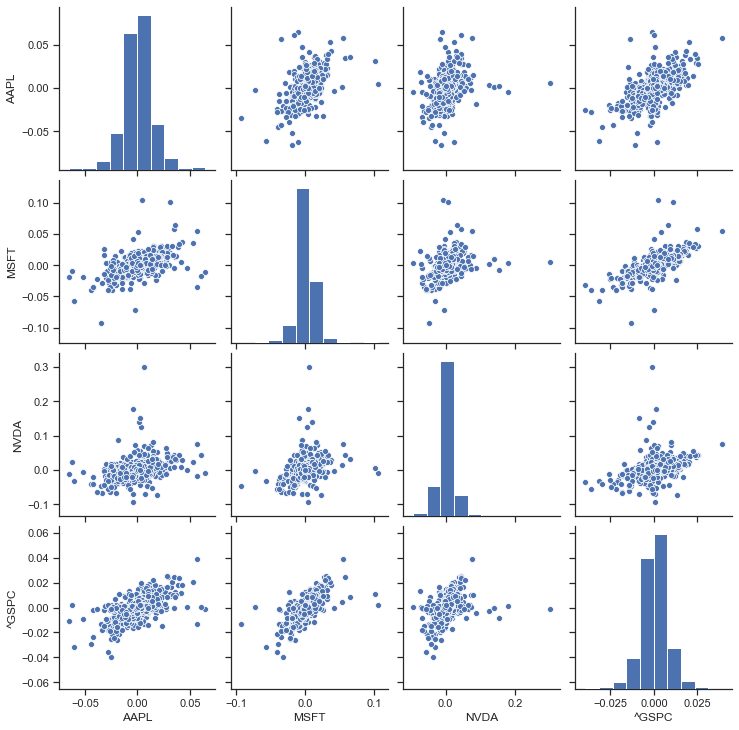

In [96]:
sns.set(style="ticks")
sns.pairplot(Rall);

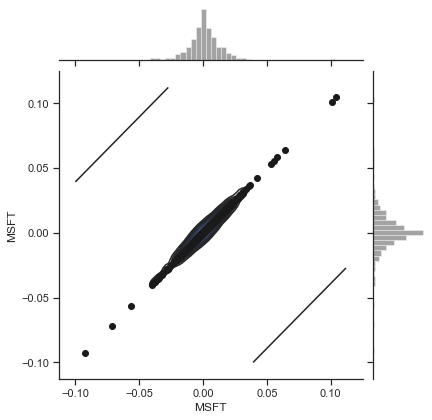

In [97]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

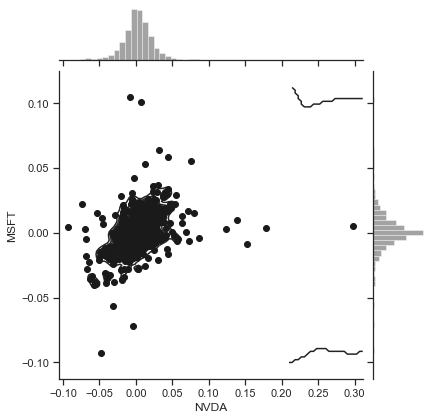

In [98]:
sns.jointplot("NVDA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

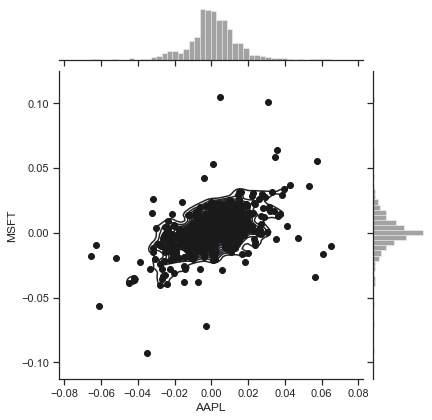

In [99]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

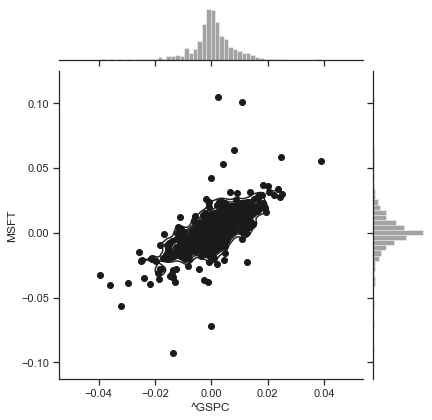

In [100]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [101]:
Rall.corr()

,AAPL,MSFT,NVDA,^GSPC
AAPL,1.000000,0.497448,0.328940,0.602271
MSFT,0.497448,1.000000,0.363636,0.681244
NVDA,0.328940,0.363636,1.000000,0.397680
^GSPC,0.602271,0.681244,0.397680,1.000000


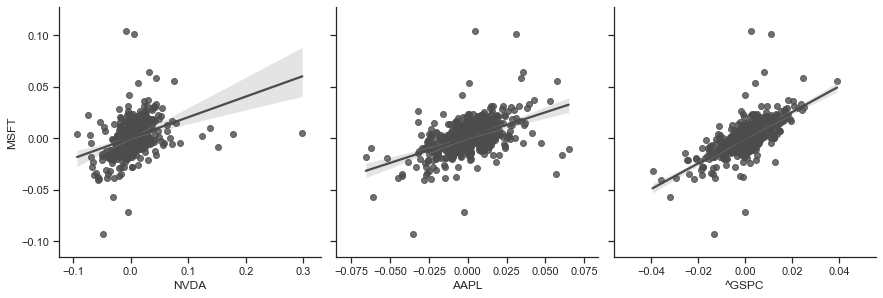

In [103]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["NVDA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");